In [56]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import operator
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\YASSER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
FILE_PATH = 'looperman_unannotatedData.txt' 

def fetch_data(path=FILE_PATH):
    with open(path) as f:
        lines = f.readlines()
    return lines


data = fetch_data()

In [45]:
# remove the trailing newline
data = [sample.rstrip("\n") for sample in data]
data = list(filter(None, data))
data = pd.DataFrame(data, columns=['sentences'])

In [46]:
print("There is {} samples in this dataset".format(len(data['sentences'])))

There is 345 samples in this dataset


In [47]:
# remove numbers and special chars
def remove_num_sym(sentence):
    
    x = re.sub('[!#?,.:";-]', '', sentence)
    x = re.sub(r'\d+', '', x)
    return x

remove_num_sym('this, is - a 85 stick.up')

'this is  a  stickup'

In [48]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(sentence, stop_words=stop_words):
    tokenized_sentence = word_tokenize(sentence)
    filtered_sentence = ' '.join([word for word in tokenized_sentence if word not in stop_words])
    return filtered_sentence

remove_stopwords('I am eating an apple', stop_words)

'I eating apple'

In [49]:
data['sentences'] = data['sentences'].apply(remove_num_sym)
data['sentences'] = data['sentences'].apply(remove_stopwords)

In [50]:
data['sentences'][0]

'Money Machine JID Bennythebutcher HoomieCrossline Juicy J Nav HoomieProbS ArpSad And Emo Guitar MelodyJuice WRLD X Nick Mira DrumsAmbi Pad Industrial Bass Industrial Guitar Industrial Bass Industrial Bass ConceptualBroken HeartGrrratatataBlinkingSlatt Gunna X Lil Baby Spanish Guitar Loop PtROLLS ROYCE PT Rave THMTSPiano BrokenLil Baby X Gunna Guitar Sample By JprbeatsIt HurtsGuitar DayanaDark Bell SpaceyPlayboi Carti Type Loop Float Part Playboi Carti X Pierre Bourne X Lil UziEating Brain Part Piano Loop FmharmLooking For You Melodic LoopOn A Beach In The Middle Of Nowhere Cool Flute Sound Gunna X FutureUK DRILL DARK COMPLETE DRUM LOOPDark Drill Piano Schiri BeatsEmotional ChordsPlayboi Carti Type Loop Float Part Playboi Carti Type Loop Float Part UK Drill Piano STRANGER By AP SupremeSimple Sinusoid Bell Only You Ambient Bryson Tiller Chords Part Travis Scott Type LoopNickdemarini EmergencyProbS BellsDays Before AstroworldProbS PadProbS PluckPlayboi Carti Magnolia LoopFUTURE DARK TRAP

In [54]:
def get_allwords(df):
    words = []
    
    for sentence in df:
        for word in sentence.split():
            words.append(word)
    return words

words = get_allwords(data['sentences'])

# count words 
word_counts = Counter(words)
word_counts = sorted(word_counts.items(), key=operator.itemgetter(1), reverse=True)
word_counts

[('X', 616),
 ('Type', 306),
 ('Loop', 228),
 ('Lil', 220),
 ('Piano', 187),
 ('Part', 160),
 ('Guitar', 143),
 ('|', 129),
 ('Trap', 104),
 ('Baby', 87),
 ('For', 80),
 ('Drill', 78),
 ('G', 72),
 ('By', 65),
 ('Melody', 64),
 ('Gunna', 60),
 ('Polo', 58),
 ('Loops', 55),
 ('Durk', 53),
 ('Carti', 52),
 ('Dark', 48),
 ('Uzi', 48),
 ('WRLD', 44),
 ('Synth', 44),
 ('PART', 43),
 ('Drum', 40),
 ('Juice', 40),
 ('UK', 39),
 ('Bell', 37),
 ('Vert', 36),
 ('The', 35),
 ('Wave', 35),
 ('Bells', 35),
 ('DRILL', 34),
 ('Drums', 34),
 ('Mira', 32),
 ('Sample', 32),
 ('House', 32),
 ('Wheezy', 31),
 ('BPM', 30),
 ('Key', 28),
 ('Playboi', 27),
 ('Pt', 27),
 ('bpm', 27),
 ('Smoke', 27),
 ('Southside', 27),
 ('A', 26),
 ('Description', 26),
 ('Pop', 25),
 ('Tags', 25),
 ('wav', 25),
 ('Prod', 25),
 ('Young', 25),
 ('Blend', 25),
 ('And', 24),
 ('Nick', 24),
 ('Travis', 24),
 ('Wrld', 24),
 ('With', 24),
 ('Acoustic', 24),
 ('Studio', 24),
 ('Tjay', 24),
 ('Bass', 23),
 ('Scott', 23),
 ('Rod', 23),

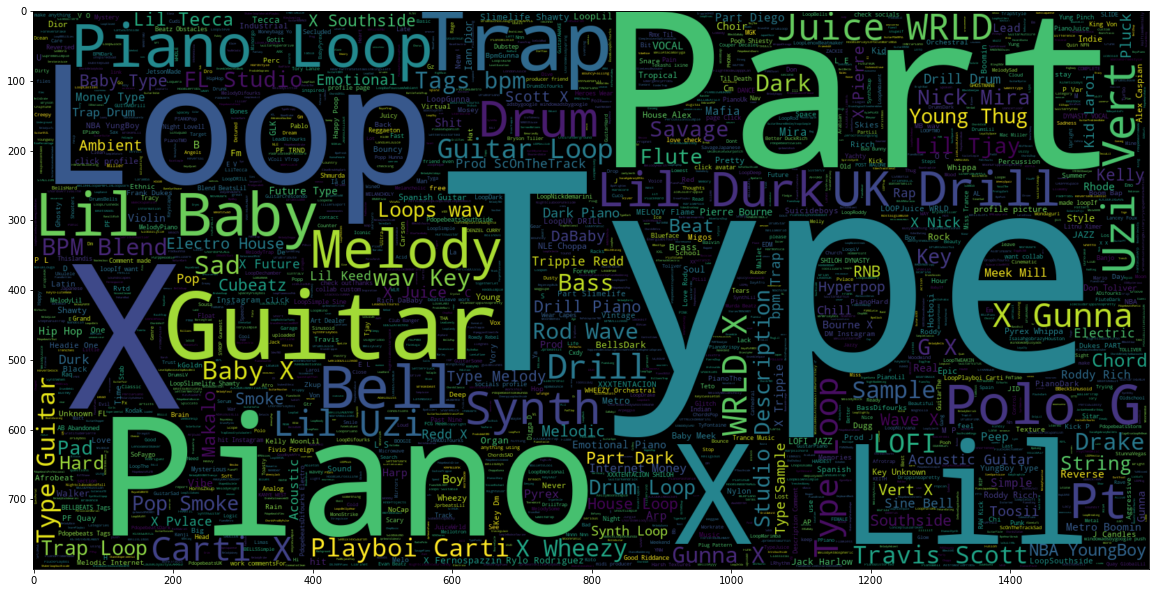

In [57]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(data.sentences))
plt.imshow(wc, interpolation = 'bilinear')